In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.indexes.base import Index

In [20]:
df = pd.read_csv('dataR2.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


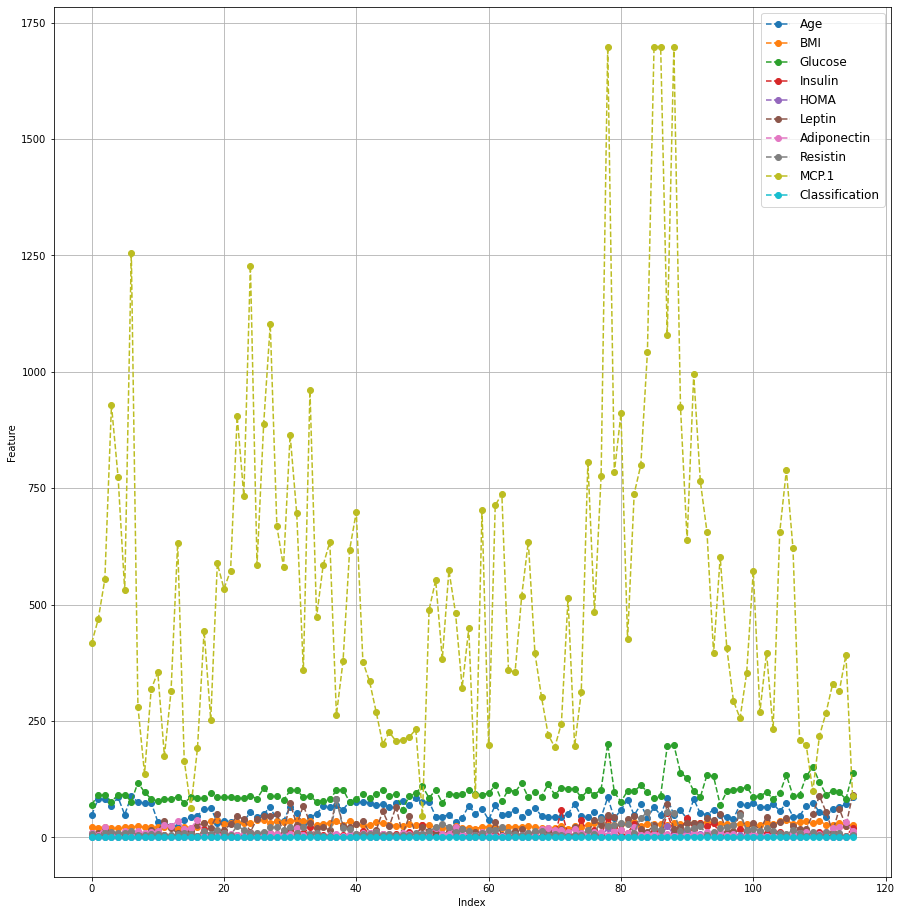

In [31]:
width_height_2 = (15, 16)
plt.figure(figsize=width_height_2)
for column in df:
    plt.plot(df.index.values, df[column], 'o--', label=column)
plt.xlabel("Index")
plt.ylabel("Feature")
plt.grid(True)
plt.legend(loc='upper right',prop={'size':12})
plt.show()

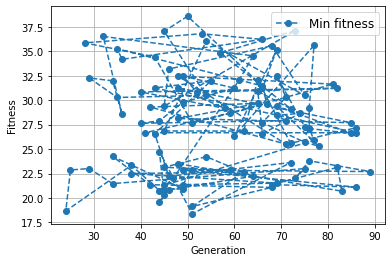

In [22]:
plt.plot(df['Age'], df['BMI'], 'o--', label='Min fitness')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.legend(loc='upper right',prop={'size':12})
plt.show()

In [41]:
# logistic regression
from sklearn.linear_model import LogisticRegression
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

/home/zahra/anaconda3/envs/my_env1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7844827586206896